<a href="https://colab.research.google.com/github/Zerberuz/evaluaciones_python_202520/blob/main/Evaluacion_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluacion 3
## Python aplicado a la Ingeniería 202520
**Docente:** Miguel Ortiz

**Estudiante:** Camilo Ernesto Calderin Ogaza

**email:** camilo.calderino@upb.edu.co

**Fecha:** 10/09/2025

**Parte 1: Filtado de datos**

(8785, 6)
Numero total de filas: 8785
Numero total de columnas: 6
[[2.024e+03 1.000e+00 1.000e+00 0.000e+00 2.730e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 1.000e+00 2.680e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 2.000e+00 2.640e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 3.000e+00 2.610e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 4.000e+00 2.590e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 5.000e+00 2.560e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 6.000e+00 2.540e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 7.000e+00 2.520e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 8.000e+00 2.510e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 9.000e+00 2.490e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 1.000e+01 2.490e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 1.100e+01 2.550e+01 0.000e+00]
 [2.024e+03 1.000e+00 1.000e+00 1.200e+01 2.740e+01 8.000e+01]
 [2.024e+03 1.000e+00 1.000e+00 1.300e+01 2.940e+01 2.970e+02]
 [2.024e+03 1.000e+00 1.000e+00 1.400e+01 3.140e+01 

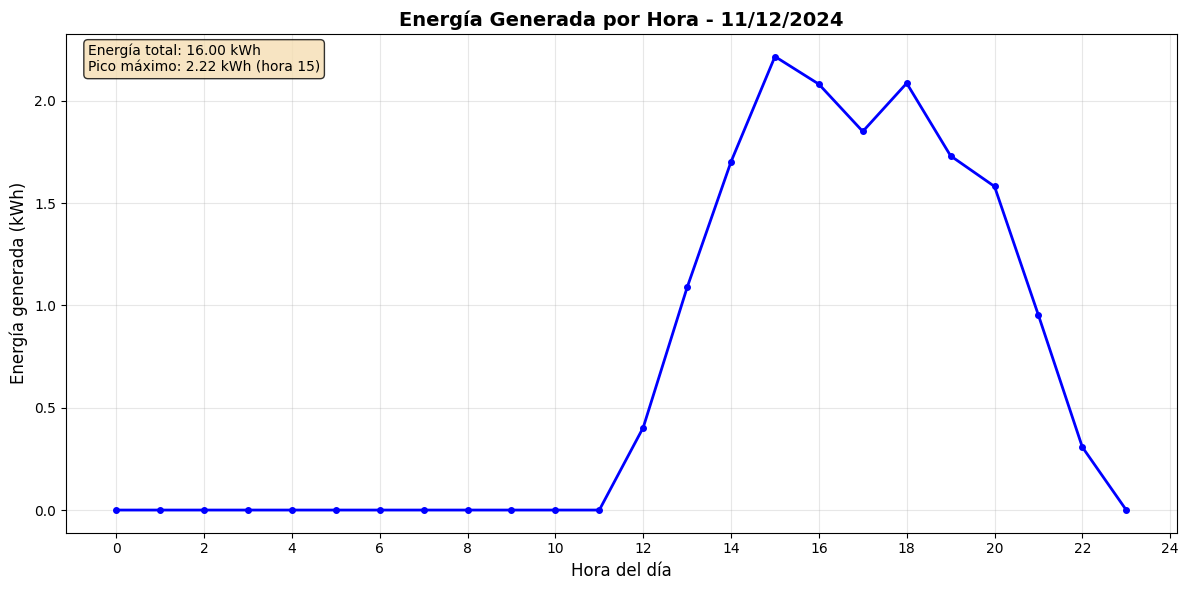

In [5]:
import numpy as np

#PARTE 1: FILTRADO DE DATOS
# Paso 1: Cargar los datos desde el archivo CSV
data = np.genfromtxt('GHI_Temp_Daily_Hourly_2024.csv', skip_header=True, delimiter=';')

# Paso 2: Verificar el tamño de datos
print(data.shape)
print(f"Numero total de filas: {data.shape[0]}")
print(f"Numero total de columnas: {data.shape[1]}")

# Paso 3: Filtrar datos manualmente
year = 2024
month = 1
day = 1

# Paso 4: Analizar los datos filtrados
filtered_data = data[(data[:, 0] == year) & (data[:, 1] == month) & (data[:, 2] == day)]
print(filtered_data)
print(len(filtered_data))
print(f"Se encontraron en la fecha {day}/{month}/{year} {len(filtered_data)} registros. ")

# Paso 5: Crear la función para filtrar datos
def filter_data_by_date(filepath, year, month, day):
    data = np.genfromtxt(filepath, skip_header=True, delimiter=';')
    datos_filtrados = data[(data[:, 0] == year) & (data[:, 1] == month) & (data[:, 2] == day)]
    if len(datos_filtrados) == 0:
        print(f"No se encontraron registros para la fecha {day}/{month}/{year}.")
    return datos_filtrados

# Paso 6: Guardar los datos filtrados en un nuevo archivo CSV
filename = f"filtered_data_{year}_{month:02d}_{day:02d}.csv"
with open(filename, "w") as file:
    file.write("Year,Month,Day,Hour,Temperature,GHI\n")
    for row in filtered_data:
        file.write(f"{int(row[0])},{int(row[1])},{int(row[2])},{int(row[3])},{row[4]:.2f},{row[5]:.2f}\n")
print(f"El archivo {filename} fue creado exitosamente")

# Paso 7: Verificación
result = filter_data_by_date('GHI_Temp_Daily_Hourly_2024.csv', 2024, 1, 1)
print("Archivo verificado - datos correctos")

# Paso 8: Agregar manejo de errores
def filter_data_by_date_improved(filepath, year, month, day):
    try:
        data = np.genfromtxt(filepath, skip_header=True, delimiter=';')
        datos_filtrados = data[(data[:, 0] == year) & (data[:, 1] == month) & (data[:, 2] == day)]
        if len(datos_filtrados) == 0:
            print(f"No se encontraron datos para la fecha {day}/{month}/{year}")
            return None
        return datos_filtrados

    except FileNotFoundError:
        print(f"No se encontró el archivo {filepath}")
        return None
    except IndexError:
        print("El archivo no tiene el formato esperado")
        return None
    except Exception as e:
        print("Error inesperado")
        print(f"Error específico: {e}")
        return None

# Paso 9: Agregar información adicional
def filter_data_final(filepath, year, month, day):
    try:
        data = np.genfromtxt(filepath, skip_header=True, delimiter=';')
        print(f"Se cargaron {len(data)} registros")

        years_available = np.unique(data[:, 0])
        print(f"Años disponibles en el archivo: {years_available.astype(int)}")

        datos_filtrados = data[(data[:, 0] == year) & (data[:, 1] == month) & (data[:, 2] == day)]

        if len(datos_filtrados) == 0:
            print(f"No se encontraron datos para la fecha {day}/{month}/{year}")
            if year not in years_available:
                print(f"El año {year} no existe en el archivo")
            return None

         #informacion relacionados con la temperatura (promedio en °C) y la radiación solar global (GHI máxima en W/m2)
        temp_promedio = np.mean(datos_filtrados[:, 4])
        ghi_maximo = np.max(datos_filtrados[:, 5])
        print(f"Se encontraron {len(datos_filtrados)} registros para la fecha {day}/{month}/{year}")
        print(f"Temperatura promedio: {temp_promedio:.2f}°C")
        print(f"GHI máximo: {ghi_maximo:.2f} W/m²")

        return datos_filtrados

    except FileNotFoundError:
        print(f"No se encontró el archivo {filepath}")
        return None
    except IndexError:
        print("El archivo no tiene el formato esperado")
        return None
    except Exception as e:
        print("Error inesperado")
        print(f"Error específico: {e}")
        return None

#PARTE 2: MODELADO DEL SISTEMA PV
#Paso 7 : Crear la función energy_calculations
def energy_calculations(filepath, year, month, day, n_panels, panel_area, panel_efficiency, inverter_efficiency, stc_temp=25, temp_coeff=-0.004):

    # Paso 1: cargar y explorar los datos filtrados
    filtered_data = filter_data_by_date(filepath, year, month, day)

    if filtered_data is None or len(filtered_data) == 0:
        print(f"No se pudieron cargar los datos para la fecha {day}/{month}/{year}")
        return None
    # Cargar los datos filtrados en una variable llamada ghi_temp_data
    ghi_temp_data = filtered_data

    # Paso 2: Extraer columnas específicas
    hours = ghi_temp_data[:, 3]  # Hora
    temp = ghi_temp_data[:, 4]   # Temperatura
    ghi = ghi_temp_data[:, 5]    # GHI

    # Paso 3: Definir parámetros del sistema PV
    stc_temp = 25
    temp_coeff = -0.004
    panel_area = 1.65
    panel_efficiency = 0.2
    n_panels = 10
    total_area = panel_area * n_panels
    inverter_efficiency = 0.95

    # Paso 4: Calcular la corrección por temperatura
    temp_correction = 1 + temp_coeff * (temp - stc_temp)

    # Paso 5: Calcular potencia DC y AC
    dc_power = ghi * total_area * panel_efficiency * temp_correction
    ac_power = dc_power * inverter_efficiency

    # Paso 6: Calcular energía total y crear archivo
    hourly_energy_kwh = ac_power / 1000
    total_energy_kwh = np.sum(hourly_energy_kwh)

    # Crear archivo de datos filtrados
    filtered_filename = f"filtered_data_{year}_{month:02d}_{day:02d}.csv"
    with open(filtered_filename, "w") as file:
        file.write("Year,Month,Day,Hour,Temperature,GHI\n")
        for row in ghi_temp_data:
            file.write(f"{int(row[0])},{int(row[1])},{int(row[2])},{int(row[3])},{row[4]:.2f},{row[5]:.2f}\n")

    # Mostrar información del archivo filtrado
    print(f"El archivo {filtered_filename} fue creado exitosamente!")
    print(f"Registros cargados: {len(ghi_temp_data)}")
    print(f"Temperatura promedio: {np.mean(temp):.2f} °C")
    print(f"Radiación máxima: {np.max(ghi):.1f} W/m²")
    print()

    # Crear archivo de energía
    energy_filename = f"energy_data_{year}_{month:02d}_{day:02d}.csv"
    with open(energy_filename, "w") as datafile:
        datafile.write("Hour,Power_DC,Power_AC,Energy_kWh\n")
        for i in range(len(hours)):
            datafile.write(f"{hours[i]:.0f},{dc_power[i]:.2f},{ac_power[i]:.2f},{hourly_energy_kwh[i]:.2f}\n")

    # Mostrar información del archivo de energía
    print(f"El archivo {energy_filename} fue creado exitosamente!")
    print(f"Registros cargados: {len(hours)}")
    print(f"Potencia DC promedio: {np.mean(dc_power):.2f} W")
    print(f"Potencia AC promedio: {np.mean(ac_power):.2f} W")
    print(f"Energía total generada: {total_energy_kwh:.2f} kWh")

    return {
        'filtered_data': ghi_temp_data,
        'dc_power': dc_power,
        'ac_power': ac_power,
        'total_energy': total_energy_kwh,
        'temp_correction': temp_correction,
        'hourly_energy': hourly_energy_kwh
    }

# BONUS: Función para generar gráfica de energía generada en función de la hora
import matplotlib.pyplot as plt
def plot_hourly_energy(result_dict, year, month, day):
    if result_dict is None:
        print("No se pueden generar gráficas sin datos válidos")
        return
    # Extraer datos del diccionario
    filtered_data = result_dict['filtered_data']
    hourly_energy = result_dict['hourly_energy']
    hours = filtered_data[:, 3]  # Columna de horas
    # Crear la gráfica
    plt.figure(figsize=(12, 6))
    plt.plot(hours, hourly_energy, 'b-o', linewidth=2, markersize=4)
    plt.title(f'Energía Generada por Hora - {day:02d}/{month:02d}/{year}', fontsize=14, fontweight='bold')
    plt.xlabel('Hora del día', fontsize=12)
    plt.ylabel('Energía generada (kWh)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 25, 2))  # Marcas cada 2 horas
    # Añadir información adicional
    total_energy = result_dict['total_energy']
    max_energy = np.max(hourly_energy)
    peak_hour = hours[np.argmax(hourly_energy)]
    # Añadir texto con estadísticas
    plt.text(0.02, 0.98,
             f'Energía total: {total_energy:.2f} kWh\nPico máximo: {max_energy:.2f} kWh (hora {peak_hour:.0f})',
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout()

    # Guardar la gráfica
    plot_filename = f"energy_plot_{year}_{month:02d}_{day:02d}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    print(f"Gráfica guardada como: {plot_filename}")
    plt.show()

# Paso 10: Pruebas finales
#Parte 1: Pruebas de la función filter_data_final
print("\n" + "="*80)
print("PARTE 1: FILTRADO DE DATOS")
print("="*80)
if __name__ == "__main__":
    # Prueba con una fecha que existe en los datos
    print("Prueba 1: Fecha existente")
    filter_data_final('GHI_Temp_Daily_Hourly_2024.csv', 2024, 1, 1)

    # Prueba con una fecha que no existe (30 de febrero)
    print("\nPrueba 2: Fecha inexistente")
    filter_data_final('GHI_Temp_Daily_Hourly_2024.csv', 2025, 2, 30)

    # Prueba con un nombre de archivo que no existe para verificar el manejo de errores
    print("\nPrueba 3: Archivo inexistente")
    filter_data_final('archivo_inexistente.csv', 2024, 1, 1)

    # Prueba con al menos 2 fechas diferentes válidas
    print("\nPrueba 4: Primera fecha válida")
    filter_data_final('GHI_Temp_Daily_Hourly_2024.csv', 2024, 6, 15)
    print("\nPrueba 5: Segunda fecha válida")
    filter_data_final('GHI_Temp_Daily_Hourly_2024.csv', 2024, 10, 8)

    # ==================== PARTE 2: PRUEBA DEL SISTEMA PV ====================
    print("\n" + "="*80)
    print("PARTE 2: MODELADO DEL SISTEMA PV")
    print("="*80)

    # Test según la imagen
    print("\nTest:")
    print("energy_calculations(\"GHI_Temp_Daily_Hourly_2024.csv\", 2024, 12, 11, 10, 1.65, 0.2, 0.95)")
    print("\nResults:")

    # Ejecutar la prueba
    result = energy_calculations("GHI_Temp_Daily_Hourly_2024.csv", 2024, 12, 11, 10, 1.65, 0.2, 0.95)

    # Generar la gráfica de energía por hora
    plot_hourly_energy(result, 2024, 12, 11)